In [1]:
import pandas
import numpy as np
import pandas as pd

#from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  
import seaborn as sns

In [2]:
df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")

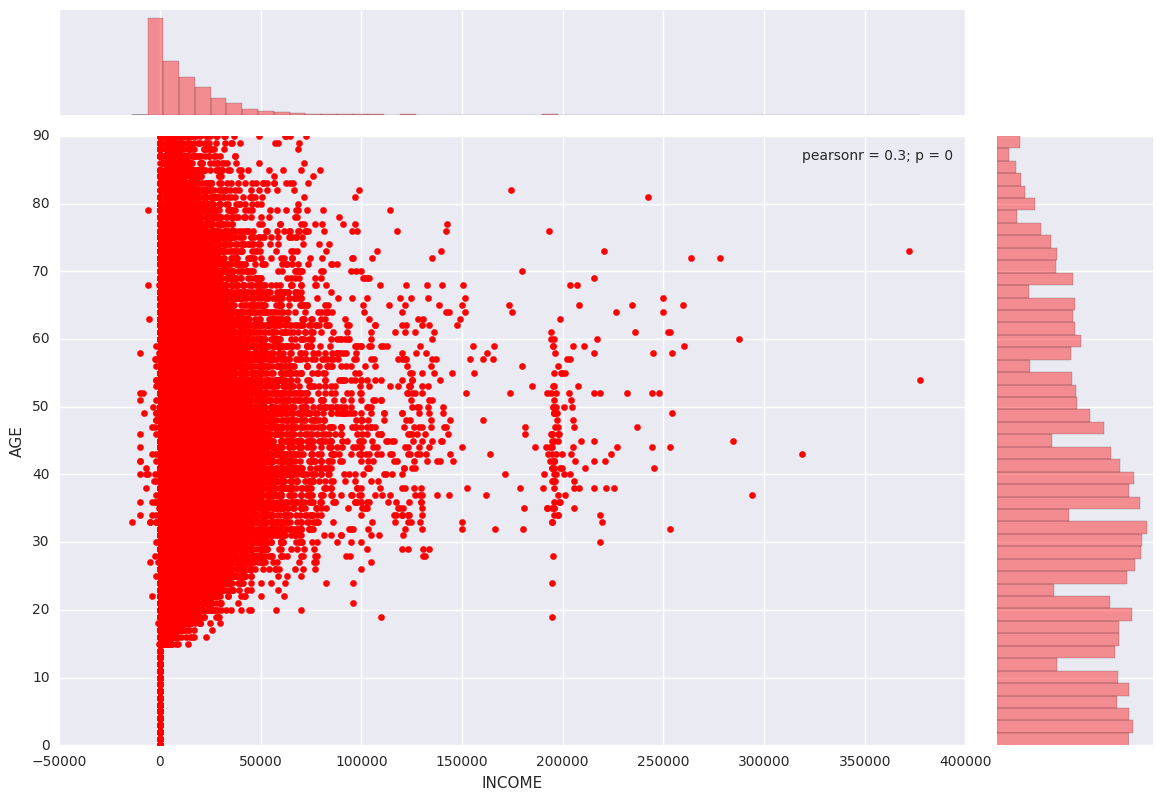

In [3]:
df_linear = pd.DataFrame()



df_linear["AGE"] = df[["AGE"]].copy()
df_linear["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_linear["YEARSCH"] = df[["YEARSCH"]].copy()
df_linear["ENGLISH"] = df[["ENGLISH"]].copy()
df_linear["FERTIL"] = df[["FERTIL"]].copy()
df_linear["YRSSERV"] = df[["YRSSERV"]].copy()

#df_linear = df_linear.ix[np.random.choice(df_linear.values.shape[0], 5)]


g = sns.jointplot("INCOME", "AGE", data=df_linear, color = "r",size=10)
g.fig.set_figwidth(12)
g.fig.set_figheight(8)
plt.ylim([0,90])
#plt.xlim([0,None])
plt.savefig("jointplot.png",bbox_inches='tight')

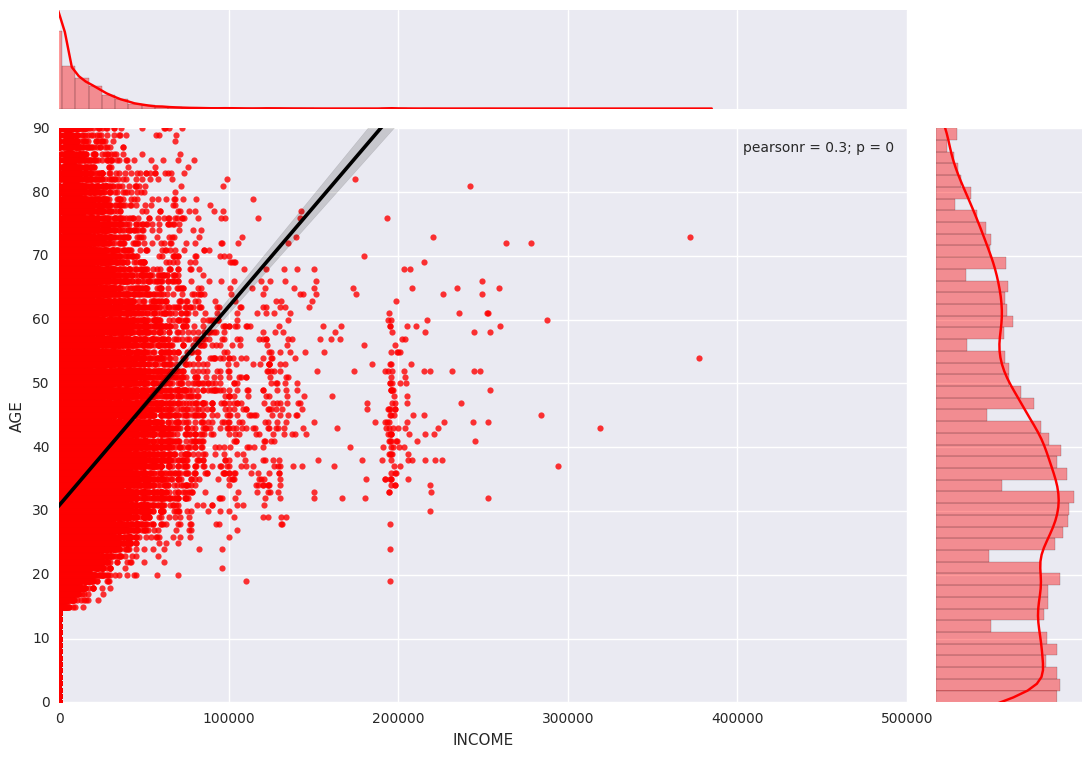

In [4]:

g = sns.jointplot("INCOME", "AGE", data=df_linear, color = "r", kind="reg",joint_kws={'line_kws':{'color':'black'}})
g.fig.set_figwidth(12)
g.fig.set_figheight(8)
plt.ylim([0,90])
plt.xlim([0,None])

plt.savefig("jointplotlin.png",bbox_inches='tight')

(50000, 1) (50000,)
(1000,) (1000,)
(1000,) (1000,)
(1000,) (1000,)


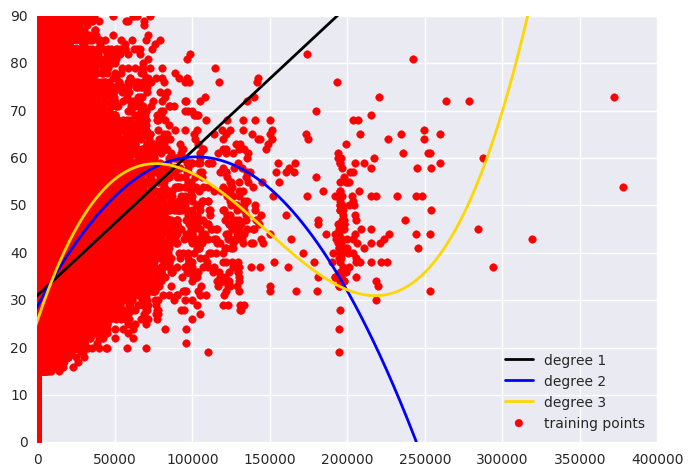

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, BayesianRidge, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler



X = df_linear[["INCOME"]].values
y = df_linear["AGE"].values

# generate points used to plot
x_plot = np.linspace(X.min(), X.max(), 1000)
X_plot = x_plot[:, np.newaxis]

print X.shape, y.shape

colors = ['black', 'blue', 'gold']
lw = 2

plt.scatter(X.T[0], y, color='red', s=30, marker='o', label="training points")

for count, degree in enumerate([1,2,3]):
    model = make_pipeline(PolynomialFeatures(degree),StandardScaler(), SGDRegressor())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    print x_plot.shape, y_plot.shape
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower right')
plt.ylim([0,90])
plt.xlim([0,None])
plt.savefig("higherorder.png",bbox_inches='tight',dpi = 200)

Using TensorFlow backend.


(50000, 1) (50000,)


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Epoch 1/100
50000/50000 [==============================] - 0s - loss: 1027.3937      

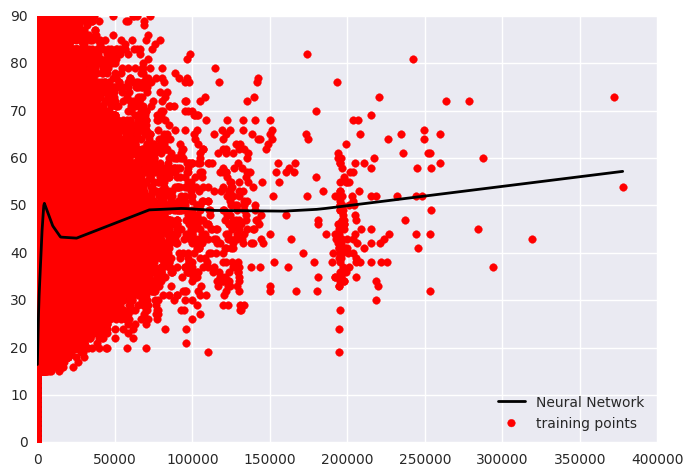

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.layers.advanced_activations import PReLU
from keras.models import Model

from sklearn.linear_model import Ridge, BayesianRidge, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def smallnn():
    # this returns a tensor
    inputs = Input(shape=(1,))

    # a layer instance is callable on a tensor, and returns a tensor
    x = Dense(64)(inputs)
    x = PReLU()(x)
    x = Dense(64)(x)
    x = PReLU()(x)
    predictions = Dense(1, activation='linear')(x)
    
    model = Model(input=inputs, output=predictions)
    model.compile(optimizer='adam',
              loss='mse')
    
    return model

X = df_linear[["INCOME"]].values
y = df_linear["AGE"].values

# generate points used to plot
x_plot = np.linspace(0, X.max(), 1000)
X_plot = x_plot[:, np.newaxis]

print X.shape, y.shape

colors = ['black', 'blue', 'gold']
lw = 2

plt.scatter(X.T[0], y, color='red', s=30, marker='o', label="training points")

for count, degree in enumerate([1]):
    sc = StandardScaler()
    sc.fit(X)
    model = smallnn()
    model.fit(sc.transform(X), y, verbose = True, nb_epoch = 100, batch_size = 200)
    y_plot = model.predict(sc.transform(X_plot))
    print x_plot.shape, y_plot.shape
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="Neural Network")

plt.legend(loc='lower right')
plt.ylim([0,90])
plt.xlim([0,None])
plt.savefig("nn.png",bbox_inches='tight', dpi = 200)
plt.show()

In [7]:
df_linear_dummies = pd.get_dummies(df_linear, columns = ["ENGLISH", "FERTIL" ])
print df_linear_dummies.columns
X = df_linear_dummies.drop(["AGE"],1).values
y = df_linear_dummies["AGE"].values


# this returns a tensor
inputs = Input(shape=(22,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64)(inputs)
x = PReLU()(x)
x = Dense(64)(x)
x = PReLU()(x)
predictions = Dense(1, activation='linear')(x)

model = Model(input=inputs, output=predictions)
model.compile(optimizer='adam',
          loss='mse')


sc.fit(X)

model.fit(sc.transform(X), y, verbose = True, nb_epoch = 100, batch_size = 200)

Index([u'AGE', u'INCOME', u'YEARSCH', u'YRSSERV', u'ENGLISH_0', u'ENGLISH_1',
       u'ENGLISH_2', u'ENGLISH_3', u'ENGLISH_4', u'FERTIL_0', u'FERTIL_1',
       u'FERTIL_2', u'FERTIL_3', u'FERTIL_4', u'FERTIL_5', u'FERTIL_6',
       u'FERTIL_7', u'FERTIL_8', u'FERTIL_9', u'FERTIL_10', u'FERTIL_11',
       u'FERTIL_12', u'FERTIL_13'],
      dtype='object')
Epoch 1/100
50000/50000 [==============================] - 0s - loss: 610.2958       